In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import copy

In [104]:
n_nodes = 20
n_nodes_with_end = n_nodes + 1
population_size = 200
offspring = 1
starting_node = 0
ending_node = 0
mutation_rate = 0.01

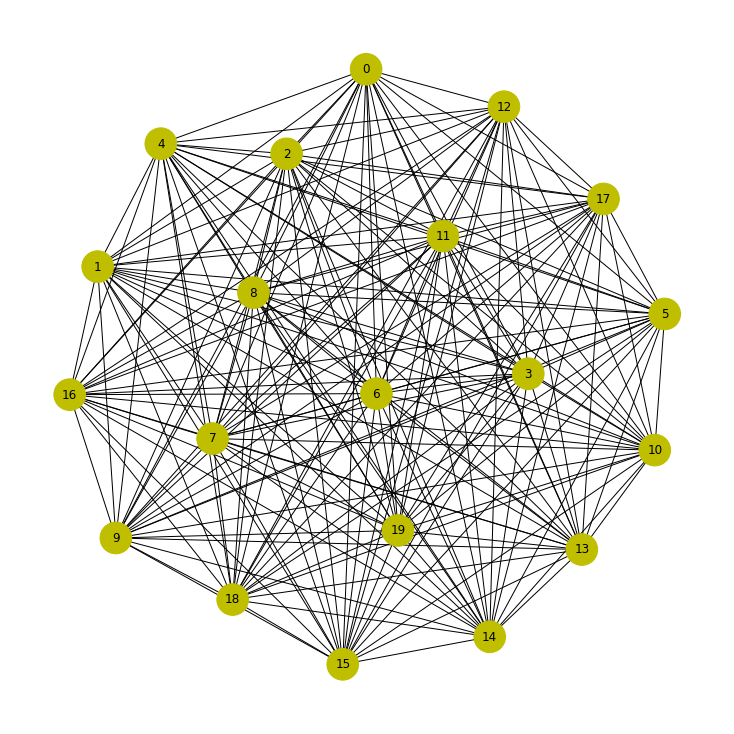

In [3]:
# ax = plt.figure(figsize=(10, 10))
# n = 20
# p = 5 / (n-1) # 5 is expected number of neighbors of a single vertex
# G = nx.gnp_random_graph(n, p)
# nx.draw(G, nx.spring_layout(G, k=1), with_labels=True, node_size=[1000]*n, node_color=['y']*n)

ax = plt.figure(figsize=(10, 10))
G = nx.complete_graph(n_nodes)
nx.draw(G, nx.spring_layout(G, k=1), with_labels=True, node_size=[1000]*n_nodes, node_color=['y']*n_nodes)

In [4]:
adj = nx.adjacency_matrix(G)

In [5]:
adj_arr = adj.toarray()

In [6]:
adj_arr

array([[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1,

In [7]:
for (u,v,w) in G.edges(data=True):
    print(u, v, w)
    w['weight'] = np.random.randint(10, 101)

    print(u, v, w)

0 1 {}
0 1 {'weight': 35}
0 2 {}
0 2 {'weight': 19}
0 3 {}
0 3 {'weight': 64}
0 4 {}
0 4 {'weight': 58}
0 5 {}
0 5 {'weight': 21}
0 6 {}
0 6 {'weight': 91}
0 7 {}
0 7 {'weight': 32}
0 8 {}
0 8 {'weight': 10}
0 9 {}
0 9 {'weight': 28}
0 10 {}
0 10 {'weight': 21}
0 11 {}
0 11 {'weight': 72}
0 12 {}
0 12 {'weight': 23}
0 13 {}
0 13 {'weight': 55}
0 14 {}
0 14 {'weight': 14}
0 15 {}
0 15 {'weight': 36}
0 16 {}
0 16 {'weight': 48}
0 17 {}
0 17 {'weight': 90}
0 18 {}
0 18 {'weight': 63}
0 19 {}
0 19 {'weight': 60}
1 2 {}
1 2 {'weight': 23}
1 3 {}
1 3 {'weight': 86}
1 4 {}
1 4 {'weight': 42}
1 5 {}
1 5 {'weight': 66}
1 6 {}
1 6 {'weight': 81}
1 7 {}
1 7 {'weight': 10}
1 8 {}
1 8 {'weight': 90}
1 9 {}
1 9 {'weight': 40}
1 10 {}
1 10 {'weight': 50}
1 11 {}
1 11 {'weight': 82}
1 12 {}
1 12 {'weight': 51}
1 13 {}
1 13 {'weight': 43}
1 14 {}
1 14 {'weight': 90}
1 15 {}
1 15 {'weight': 64}
1 16 {}
1 16 {'weight': 92}
1 17 {}
1 17 {'weight': 17}
1 18 {}
1 18 {'weight': 97}
1 19 {}
1 19 {'weight': 29

In [8]:
edge_labels = nx.get_edge_attributes(G, 'weight')

In [9]:
edge_labels

{(0, 1): 35,
 (0, 2): 19,
 (0, 3): 64,
 (0, 4): 58,
 (0, 5): 21,
 (0, 6): 91,
 (0, 7): 32,
 (0, 8): 10,
 (0, 9): 28,
 (0, 10): 21,
 (0, 11): 72,
 (0, 12): 23,
 (0, 13): 55,
 (0, 14): 14,
 (0, 15): 36,
 (0, 16): 48,
 (0, 17): 90,
 (0, 18): 63,
 (0, 19): 60,
 (1, 2): 23,
 (1, 3): 86,
 (1, 4): 42,
 (1, 5): 66,
 (1, 6): 81,
 (1, 7): 10,
 (1, 8): 90,
 (1, 9): 40,
 (1, 10): 50,
 (1, 11): 82,
 (1, 12): 51,
 (1, 13): 43,
 (1, 14): 90,
 (1, 15): 64,
 (1, 16): 92,
 (1, 17): 17,
 (1, 18): 97,
 (1, 19): 29,
 (2, 3): 27,
 (2, 4): 24,
 (2, 5): 75,
 (2, 6): 15,
 (2, 7): 37,
 (2, 8): 87,
 (2, 9): 32,
 (2, 10): 36,
 (2, 11): 42,
 (2, 12): 61,
 (2, 13): 40,
 (2, 14): 85,
 (2, 15): 20,
 (2, 16): 16,
 (2, 17): 15,
 (2, 18): 96,
 (2, 19): 32,
 (3, 4): 23,
 (3, 5): 91,
 (3, 6): 32,
 (3, 7): 19,
 (3, 8): 33,
 (3, 9): 91,
 (3, 10): 24,
 (3, 11): 16,
 (3, 12): 55,
 (3, 13): 73,
 (3, 14): 18,
 (3, 15): 83,
 (3, 16): 93,
 (3, 17): 23,
 (3, 18): 28,
 (3, 19): 22,
 (4, 5): 59,
 (4, 6): 31,
 (4, 7): 72,
 (4, 8): 26

In [10]:
weighted_adj_arr = nx.adjacency_matrix(G).toarray()

In [11]:
weighted_adj_arr

array([[  0,  35,  19,  64,  58,  21,  91,  32,  10,  28,  21,  72,  23,
         55,  14,  36,  48,  90,  63,  60],
       [ 35,   0,  23,  86,  42,  66,  81,  10,  90,  40,  50,  82,  51,
         43,  90,  64,  92,  17,  97,  29],
       [ 19,  23,   0,  27,  24,  75,  15,  37,  87,  32,  36,  42,  61,
         40,  85,  20,  16,  15,  96,  32],
       [ 64,  86,  27,   0,  23,  91,  32,  19,  33,  91,  24,  16,  55,
         73,  18,  83,  93,  23,  28,  22],
       [ 58,  42,  24,  23,   0,  59,  31,  72,  26,  22,  76,  58,  53,
         55,  99,  60,  82,  69,  90,  87],
       [ 21,  66,  75,  91,  59,   0,  70,  77,  77,  95,  50,  20,  75,
         58,  78,  62,  32,  20,  20,  85],
       [ 91,  81,  15,  32,  31,  70,   0,  80,  92,  97,  44,  54,  31,
        100,  72,  24,  32,  66,  81,  15],
       [ 32,  10,  37,  19,  72,  77,  80,   0,  18,  78,  64,  37,  52,
         25,  56,  24,  54,  27,  75,  77],
       [ 10,  90,  87,  33,  26,  77,  92,  18,   0,  80,  41,  

### If we know where to start i.e. the starting node is fixed

In [105]:
P = np.array([np.random.choice([i for i in range(1, n_nodes)], size=n_nodes-1, replace=False) for _ in range(population_size)])

In [13]:
P

array([[ 7, 13, 12, ...,  4,  2, 18],
       [17,  8, 18, ..., 12, 13,  2],
       [ 8, 16,  6, ..., 13, 19, 17],
       ...,
       [ 1, 19,  7, ..., 17,  9,  3],
       [14,  4, 15, ...,  1, 18,  2],
       [12, 17, 15, ...,  5, 13, 19]])

In [ ]:
P.shape

(1000, 19)

In [106]:
P = np.concatenate((np.array([starting_node]*population_size).reshape(-1, 1), P, np.array([ending_node]*population_size).reshape(-1, 1)), axis=1)

In [ ]:
P

array([[ 0, 16, 17, ..., 15,  5,  0],
       [ 0,  6, 10, ..., 19,  4,  0],
       [ 0,  7, 18, ..., 12,  8,  0],
       ...,
       [ 0, 16,  6, ...,  5,  9,  0],
       [ 0, 19,  8, ..., 16,  7,  0],
       [ 0,  2, 12, ..., 13,  5,  0]])

In [ ]:
P.shape

(1000, 21)

### If we don't have any restrictions i.e. any node can be starting node

In [107]:
P = np.array([np.random.choice([i for i in range(n_nodes)], size=n_nodes, replace=False) for _ in range(population_size)])

In [108]:
P

array([[14, 10,  8, ...,  9, 11,  6],
       [19,  3, 10, ...,  8,  0, 11],
       [ 9, 17,  5, ...,  8,  2, 13],
       ...,
       [ 4,  0,  6, ...,  8, 11, 16],
       [ 2, 18,  4, ...,  7,  0, 14],
       [ 1, 12, 10, ..., 17, 14,  3]])

In [109]:
P.shape

(200, 20)

In [110]:
P = np.concatenate((P, np.array(P[:, 0]).reshape(-1, 1)), axis=1)

In [111]:
P

array([[14, 10,  8, ..., 11,  6, 14],
       [19,  3, 10, ...,  0, 11, 19],
       [ 9, 17,  5, ...,  2, 13,  9],
       ...,
       [ 4,  0,  6, ..., 11, 16,  4],
       [ 2, 18,  4, ...,  0, 14,  2],
       [ 1, 12, 10, ..., 14,  3,  1]])

In [112]:
P.shape

(200, 21)

In [113]:
def fitness(P):
    edge_sum = []
    for each_chromosome in P:
        total = 0
        edge_values = []
        for i in range(0, each_chromosome.shape[0]-1):
            weight = weighted_adj_arr[each_chromosome[i]][each_chromosome[i+1]]
            edge_values.append(weight)
            total += weight
        
        # print(edge_values)
        edge_sum.append(total)
    
    return np.array(edge_sum)

In [34]:
fit = fitness(P)
fit

array([1226, 1236, 1119, 1205,  972, 1001, 1059,  966, 1101,  883,  989,
       1147,  981,  826,  932, 1095, 1178, 1037,  822, 1006, 1099,  968,
        977, 1034, 1084, 1108,  993, 1074,  869, 1036,  868, 1142, 1028,
       1130, 1099,  949, 1136, 1167,  919, 1178,  767, 1139, 1018, 1111,
       1151,  908,  959,  997, 1113, 1094, 1100,  934,  981, 1141, 1096,
       1275, 1178, 1142,  987,  958,  978, 1192,  897, 1072,  964, 1004,
       1062,  943, 1050, 1136,  809,  737, 1335, 1050,  961,  834, 1208,
        984, 1067,  832, 1167,  983,  856, 1050,  917, 1156,  966, 1154,
       1051,  861, 1028, 1266, 1035, 1044,  953, 1078,  958, 1203, 1163,
        966,  843, 1040,  910, 1069,  994, 1029, 1140, 1073, 1086, 1151,
       1105, 1127, 1077,  916, 1021, 1153,  950, 1106,  866, 1058, 1042,
       1089, 1132, 1156, 1041, 1095, 1029, 1094, 1063,  735,  982, 1369,
       1276,  924, 1105, 1103, 1076,  857, 1069, 1001,  947, 1002,  922,
        885, 1069, 1035, 1147, 1080, 1175, 1168,  9

In [35]:
fit.sum(), fit.max(), fit.min()

(1046259, 1401, 675)

In [39]:
t = 1 / fit

In [40]:
np.sum(t / np.sum(t))

1.0

In [41]:
norm_fit = t / np.sum(t)

In [42]:
norm_fit

array([0.00084238, 0.00083557, 0.00092293, 0.00085706, 0.00106251,
       0.00103173, 0.00097522, 0.00106911, 0.00093802, 0.0011696 ,
       0.00104425, 0.0009004 , 0.00105276, 0.00125032, 0.00110811,
       0.00094316, 0.00087671, 0.00099591, 0.0012564 , 0.0010266 ,
       0.00093973, 0.0010669 , 0.00105707, 0.0009988 , 0.00095273,
       0.00093209, 0.00104004, 0.0009616 , 0.00118845, 0.00099687,
       0.00118982, 0.00090434, 0.00100463, 0.00091395, 0.00093973,
       0.00108826, 0.00090912, 0.00088497, 0.00112379, 0.00087671,
       0.00134649, 0.00090673, 0.0010145 , 0.00092958, 0.00089727,
       0.0011374 , 0.00107691, 0.00103587, 0.00092791, 0.00094402,
       0.00093887, 0.00110574, 0.00105276, 0.00090514, 0.0009423 ,
       0.00081001, 0.00087671, 0.00090434, 0.00104636, 0.00107804,
       0.00105599, 0.00086641, 0.00115135, 0.0009634 , 0.00107133,
       0.00102865, 0.00097247, 0.00109519, 0.00098358, 0.00090912,
       0.00127659, 0.0014013 , 0.0007736 , 0.00098358, 0.00107

In [43]:
norm_fit.sum()

1.0

In [147]:
def crossover(P1, P2):
    # rnd_val, side = get_random_sides(chromosome_size)

    # # print(rnd_val, side)
    # if side == 'left':
    #     P1[:rnd_val], P2[:rnd_val] = list(P2[:rnd_val]), list(P1[:rnd_val])

    # elif side == 'right':
    #     P1[-rnd_val:], P2[-rnd_val:] = list(P2[-rnd_val:]), list(P1[-rnd_val:])

    # elif side == 'both_lr':
    #     P1[:rnd_val], P2[:rnd_val] = list(P2[:rnd_val]), list(P1[:rnd_val])
    #     P1[-rnd_val:], P2[-rnd_val:] = list(P2[-rnd_val:]), list(P1[-rnd_val:])
    
    # else: # range
    #     rnd_idx = getRandomIndex(chromosome_size, length=length)
    #     P1[rnd_idx: rnd_idx+length], P2[rnd_idx: rnd_idx+length] = list(P2[rnd_idx: rnd_idx+length]), list(P1[rnd_idx: rnd_idx+length])

    
    # return P1, P2

    # mid_point = int(P1.shape[0]/2)

    # p1 = P1[:mid_point]

    # p2 = []
    # for i in range(P2.shape[0]-1, -1, -1):
    #     if P2[i] not in p1:
    #         p2.append(P2[i])

    # merged = np.concatenate((p1, p2, np.array([ending_node])), axis=0)

    # return merged
    
    # print(P1, P2)
    mid_point = int(P1.shape[0]/2)

    p1 = P1[:mid_point]
    # print(p1)
    # print(P2[mid_point:])

    p2 = []
    for i in range(P2.shape[0]-1):
        if P2[i] not in p1:
            p2.append(P2[i])

    merged = np.concatenate((p1, p2, np.array([p1[0]])), axis=0)

    return merged

In [68]:
P[0], P[1]

(array([16,  3, 12, 17,  5, 19, 18,  4, 13, 10,  2, 14,  8,  6,  0,  7,  9,
         1, 15, 11, 16]),
 array([11,  4,  1,  6,  0, 17, 14,  2, 15, 19, 13, 10, 12,  7,  9,  8,  5,
         3, 16, 18, 11]))

In [121]:
m = crossover(P[0], P[1])

In [122]:
m

array([14, 10,  8, 12,  2, 13,  0, 17, 18, 16, 19,  3,  4,  1,  6,  5,  7,
       15,  9, 11, 14])

---

In [144]:
# Swap Mutation - Swap 2 nodes randomly
def mutation(C):
    # print(C.shape[0])
    idx1, idx2 = np.random.choice([i for i in range(1, C.shape[0]-1)], size=2, replace=False)
    # print(idx1, idx2)
    check_swap = np.random.choice([True, False], size=1, replace=False, p=[mutation_rate, 1-mutation_rate])
    if check_swap:
        C[idx1], C[idx2] = C[idx2], C[idx1]

    return list(C)

In [123]:
mut_m = mutation(m)
mut_m

array([14, 10,  8, 12,  2, 13,  0, 17, 18, 16, 19,  3,  4,  1,  6,  5,  7,
       15,  9, 11, 14])

---

In [195]:
P_copy = copy.deepcopy(P)
P_copy

array([[14, 10,  8, ..., 11,  6, 14],
       [19,  3, 10, ...,  0, 11, 19],
       [ 9, 17,  5, ...,  2, 13,  9],
       ...,
       [ 4,  0,  6, ..., 11, 16,  4],
       [ 2, 18,  4, ...,  0, 14,  2],
       [ 1, 12, 10, ..., 14,  3,  1]])

In [196]:
stop_flag = False
n_gen = 1
min_fitness_per_gen = [np.inf]
min_fitness_idx_per_gen = []
min_fitness_gen = []
path = []
all_min_val = []

for _ in range(2000):
    print(f"Generation: {n_gen}")
    print(P_copy)
    print('\n')

    # Fitness Function
    fitness_score = fitness(P_copy)
    # Stopping condition
    # if fitness_score.min() == expected_output:
    #     stop_flag = True
    min_val = fitness_score.min()
    all_min_val.append(min_val)
    if min_val < min_fitness_per_gen[-1]:
        min_fitness_per_gen.append(min_val)
        min_val_idx = list(fitness_score).index(min_val)
        min_fitness_idx_per_gen.append(min_val_idx)
        path.append(P_copy[min_val_idx])
        min_fitness_gen.append(n_gen)
    
    # To make higher score lower and lower score higher so the probability is high for lower values, because we need the minimum value
    inverse_fitness_score = 1 / fitness_score
    fitness_score_prob = inverse_fitness_score / np.sum(inverse_fitness_score)
    # fitness_score_inverse_prob = 1 - fitness_score_prob
    # fitness_score_inverse_prob = fitness_score_inverse_prob / np.sum(fitness_score_inverse_prob)

    new_population = []
    # Build Mating Pool
    for _ in range(population_size):
        # Give 2 parent from selection
        parent1_idx, parent2_idx = np.random.choice([i for i in range(population_size)], size=2, replace=False, p=list(fitness_score_prob))

        # Crossover
        child = crossover(P_copy[parent1_idx], P_copy[parent2_idx])

        # Mutation
        mutate_child = mutation(child)

        # Add new children to the new population
        new_population.append(mutate_child)

    # print(len(new_population))
    # print([len(item) for item in new_population])
    # print(np.array(new_population))

    # Replace old population
    P_copy = np.array(new_population)


    n_gen += 1

Streaming output truncated to the last 5000 lines.
Generation: 1501
[[18  9 13 ...  6  3 18]
 [18  9 13 ...  6  3 18]
 [18  9 13 ...  6  3 18]
 ...
 [18  9 13 ...  6  3 18]
 [18  9 13 ...  6  3 18]
 [18  9 13 ...  6  3 18]]


Generation: 1502
[[18  9 13 ...  6  3 18]
 [18  9 13 ...  6  3 18]
 [18  9 13 ...  6  3 18]
 ...
 [18  9 13 ...  6  3 18]
 [18  9 13 ...  6  3 18]
 [18  9 13 ...  6  3 18]]


Generation: 1503
[[18  9 13 ...  6  3 18]
 [18  9 13 ...  6  3 18]
 [18  9 13 ...  6  3 18]
 ...
 [18  9 13 ...  6  3 18]
 [18  9 13 ...  6  3 18]
 [18  9 13 ...  6  3 18]]


Generation: 1504
[[18  9 13 ...  6  3 18]
 [18  9 13 ...  6  3 18]
 [18  9 13 ...  6  3 18]
 ...
 [18  9 13 ...  6  3 18]
 [18  9 13 ...  6  3 18]
 [18  9 13 ...  6  3 18]]


Generation: 1505
[[18  9 13 ...  6  3 18]
 [18  9 13 ...  6  3 18]
 [18  9 13 ...  6  3 18]
 ...
 [18  9 13 ...  6  3 18]
 [18  9 13 ...  6  3 18]
 [18  9 13 ...  6  3 18]]


Generation: 1506
[[18  9 13 ...  6  3 18]
 [18  9 13 ...  6  3 18]
 [18  9

In [197]:
min_fitness_per_gen

[inf,
 728,
 715,
 697,
 681,
 652,
 648,
 641,
 637,
 631,
 619,
 616,
 583,
 576,
 549,
 546,
 544,
 543,
 539,
 521,
 515,
 507,
 501]

In [198]:
min_fitness_idx_per_gen

[83,
 147,
 107,
 135,
 36,
 24,
 53,
 151,
 47,
 59,
 94,
 169,
 47,
 51,
 133,
 116,
 59,
 137,
 176,
 7,
 33,
 71]

In [200]:
min_fitness_gen

[1,
 3,
 7,
 10,
 11,
 23,
 27,
 32,
 34,
 36,
 71,
 76,
 147,
 171,
 179,
 250,
 279,
 297,
 320,
 450,
 576,
 1255]

In [201]:
all_min_val

[728,
 732,
 715,
 744,
 787,
 722,
 697,
 697,
 719,
 681,
 652,
 652,
 652,
 676,
 687,
 656,
 681,
 687,
 655,
 673,
 673,
 662,
 648,
 648,
 668,
 652,
 641,
 641,
 641,
 641,
 641,
 637,
 641,
 631,
 631,
 619,
 619,
 619,
 619,
 619,
 619,
 641,
 641,
 648,
 648,
 640,
 645,
 645,
 645,
 631,
 645,
 645,
 645,
 645,
 653,
 626,
 664,
 664,
 626,
 626,
 626,
 626,
 623,
 623,
 626,
 623,
 626,
 620,
 620,
 620,
 616,
 620,
 620,
 620,
 616,
 583,
 583,
 620,
 620,
 620,
 620,
 620,
 620,
 620,
 620,
 620,
 620,
 620,
 620,
 618,
 620,
 620,
 620,
 602,
 620,
 620,
 620,
 620,
 620,
 620,
 620,
 620,
 616,
 616,
 620,
 620,
 620,
 620,
 620,
 620,
 612,
 620,
 620,
 620,
 620,
 620,
 600,
 620,
 620,
 620,
 620,
 620,
 623,
 623,
 623,
 623,
 623,
 623,
 623,
 623,
 623,
 623,
 623,
 623,
 623,
 623,
 618,
 616,
 616,
 616,
 616,
 584,
 616,
 623,
 623,
 623,
 576,
 623,
 623,
 623,
 623,
 623,
 623,
 623,
 623,
 623,
 623,
 623,
 623,
 613,
 623,
 602,
 602,
 615,
 615,
 588,
 588

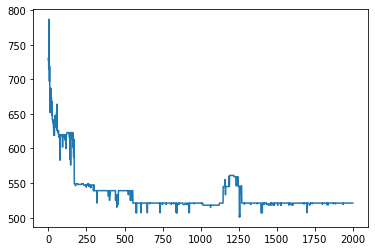

In [203]:
plt.plot([i for i in range(2000)], all_min_val)

In [204]:
path

[array([ 0,  5,  7, 13,  1,  8, 11,  9, 14, 17,  4,  3, 18, 19,  6, 16, 12,
        10,  2, 15,  0]),
 array([18,  9, 13,  1, 17, 12, 16, 11,  2,  7,  8,  4,  0,  6, 19,  3, 15,
        14, 10,  5, 18]),
 array([18,  9, 13,  1, 17, 12, 16, 11,  2,  7, 14,  3,  4,  6, 19,  5,  0,
        15, 10,  8, 18]),
 array([18,  9, 13,  1, 17, 12, 16, 11,  2,  7, 15,  8,  4,  3,  6,  5, 19,
        14,  0, 10, 18]),
 array([18,  9, 13,  1, 17, 12, 16, 11,  2,  7,  0,  5,  4, 19,  6, 15, 14,
        10,  3,  8, 18]),
 array([18,  9, 13,  1, 17, 12, 16, 11,  2,  7,  8, 15,  6,  3,  4, 19, 14,
         0, 10,  5, 18]),
 array([18,  9, 13,  1, 17, 12, 16, 11,  2,  7,  6,  3,  4,  8, 15, 19, 14,
         0, 10,  5, 18]),
 array([18,  9, 13,  1, 17, 12, 16,  6,  2,  7, 11, 14, 10,  5, 15, 19,  0,
         8,  4,  3, 18]),
 array([18,  9, 13,  1, 17, 12, 16, 11, 10,  7,  2,  6,  3,  4,  8, 15, 19,
        14,  0,  5, 18]),
 array([18,  9, 13,  1, 17, 12, 16, 11,  2,  7, 10,  6,  3,  4,  8, 15, 19,
      

In [205]:
edge_path = []
for i in range(n_nodes):
    edge_path.append((list(path[-1])[i], list(path[-1])[i+1]))

In [206]:
edge_path

[(18, 9),
 (9, 13),
 (13, 1),
 (1, 0),
 (0, 12),
 (12, 16),
 (16, 11),
 (11, 5),
 (5, 17),
 (17, 2),
 (2, 7),
 (7, 8),
 (8, 4),
 (4, 3),
 (3, 14),
 (14, 15),
 (15, 19),
 (19, 6),
 (6, 10),
 (10, 18)]

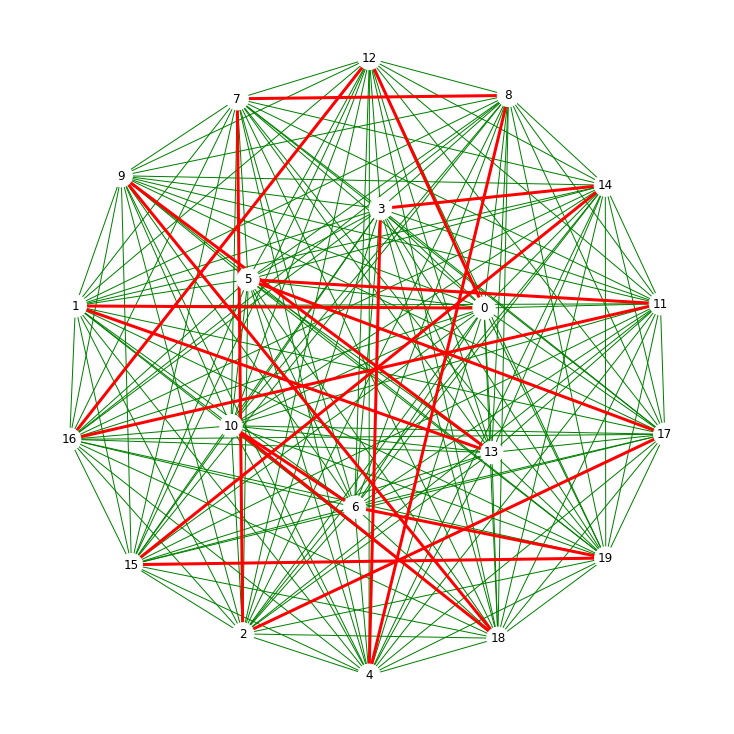

In [207]:
ax = plt.figure(figsize=(10, 10))

G1 = nx.complete_graph(n_nodes)
pos = nx.spring_layout(G1, k=1)
nx.draw(G1, pos, with_labels=True, node_size=[500]*n_nodes, node_color=['w']*n_nodes, edge_color='g')
# draw path in red
nx.draw_networkx_edges(G1, pos, edgelist=edge_path, edge_color='r', width=3)
plt.axis('equal')
plt.show()